In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
train=pd.read_csv("mnistTrain.csv")
#test=pd.read_csv("mnistTest.csv")

In [3]:
# info about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# description about the dataset
train.describe

<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

     

In [5]:
# taking labels and data to different datasets
l=train['label']
d=train.drop("label",axis=1)

In [6]:
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


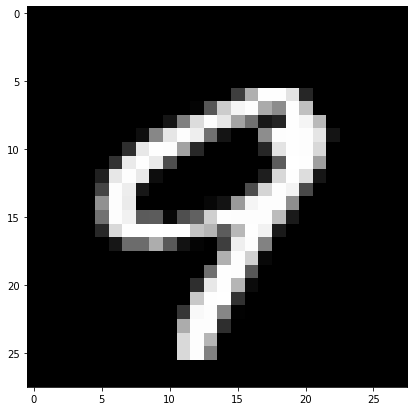

9


In [7]:
plt.figure(figsize=(7,7))
idx=100
grid_data = d.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()
print(l[idx])

In [8]:
labels=l.head(15000)
data=d.head(15000)

In [9]:
# standardisation of the data
from sklearn.preprocessing import StandardScaler
sample_data=StandardScaler().fit_transform(data)

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


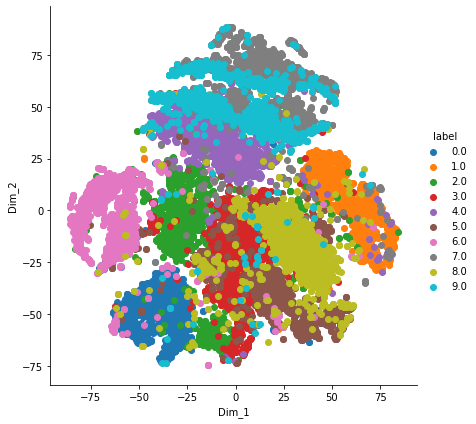

In [10]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0,n_jobs=-1)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(sample_data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()